# Predicting Loan Repayment #

## Key Takeaways: ##

- **Our initial logistic model was 83.64% accurate relative to a baseline accuracy rate of 83.99%. Though underwhelming, when assessed against the ROC curve, the model's AUC came in at .6721, decidedly better than the benchmark .5 (i.e., a coin toss).**


- **Our initial model also outperformed a bivariate "smart baseline" whose AUC was .6239.**


- **Risk predictions from our model were used to successfully identify a subset of 100 high-yield loans in which one could invest to maximize return and tailor risk exposure to one's liking.**


- **We increased the parsimony of our model in our "Beyond the Assignment" section, an addition not required by MIT. Gains were not made the model's confusion matrix accuracy remained unchanged, and its AUC profile declined by only .0021. We consider this a win, given the streamlining we achieved.**

### The Problem ###

"In the lending industry, investors provide loans to borrowers in exchange for the promise of repayment with interest. If the borrower repays the loan, then the lender profits from the interest. However, if the borrower is unable to repay the loan, then the lender loses money. Therefore, lenders face the problem of predicting the risk of a borrower being unable to repay a loan."

(source: MITx)

### The Data ###

"To address this problem, we will use publicly available data from LendingClub.com, a website that connects borrowers and investors over the Internet. This dataset represents 9,578 3-year loans that were funded through the LendingClub.com platform between May 2007 and February 2010. The binary dependent variable not.fully.paid indicates that the loan was not paid back in full (the borrower either defaulted or the loan was "charged off," meaning the borrower was deemed unlikely to ever pay it back)."

To predict this dependent variable, we will use the following independent variables available to the investor when deciding whether to fund a loan:

**credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

**purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

**int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

**installment**: The monthly installments ($) owed by the borrower if the loan is funded.

**log.annual.inc**: The natural log of the self-reported annual income of the borrower.

**dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

**fico**: The FICO credit score of the borrower.

**days.with.cr.line**: The number of days the borrower has had a credit line.

**revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

**revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

**inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.

**delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

**pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

(source: MITx)

In [183]:
loans = read.csv("loans.csv")

### Data Structure ###

In [184]:
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


### Data Summary ###

In [185]:
summary(loans)

 credit.policy                 purpose        int.rate       installment    
 Min.   :0.000   all_other         :2331   Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   credit_card       :1262   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   debt_consolidation:3957   Median :0.1221   Median :268.95  
 Mean   :0.805   educational       : 343   Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000   home_improvement  : 629   3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000   major_purchase    : 437   Max.   :0.2164   Max.   :940.14  
                 small_business    : 619                                    
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.928   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4562    
 3rd Qu.:11.290   3rd Qu.:17.950   3rd 

### Exploratory Data Analysis ### 

In [186]:
install.packages("corrplot")
install.packages("ggplot2")
install.packages("mice")
install.packages("caTools")
install.packages("ROCR")
library(ROCR)
library(caTools)
library(corrplot)
library(mice)
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("mice"):
“installation of package ‘mice’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("caTools"):
“installation of package ‘caTools’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Columns missing at least one value are listed below. We will approximate these values using "Multiple Imputation by Chained Equations" (a/k/a "MICE") and complete our data set.

In [187]:
# https://stackoverflow.com/questions/20364450
na_values = colnames(loans)[apply(is.na(loans), 2, any)]
cat(na_values, sep=", ")

log.annual.inc, days.with.cr.line, revol.util, inq.last.6mths, delinq.2yrs, pub.rec

In [188]:
set.seed(144)

# set vars.for.imputation to all variables in the data frame except for not.fully.paid, 
# to impute the values using all other independent variables
vars.for.imputation = setdiff(names(loans), "not.fully.paid")

imputed = complete(mice(loans[vars.for.imputation]))

loans[vars.for.imputation] = imputed


 iter imp variable
  1   1  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  1   2  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  1   3  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  1   4  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  1   5  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  2   1  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  2   2  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  2   3  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  2   4  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  2   5  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  3   1  log.annual.inc  days.with.cr.line  revol.

Credit-related data sets should exhibit multicollinearity among the variables based on the principles of modern finance. Low-risk credits (e.g., individuals with high FICO scores) should be assigned lower interest rates relative to high-risk credits (e.g., individuals with low credit scores). One would expect borrowers with low debt-to-income ratios to receive lower interest rates and use a lower percentage of their revolving credit facility than other borrowers.

The correlation plot below confirms our intuition regarding the aforementioned relationships. Furthermore, our plot highlights several other weaker relationships among the variables relative to individual fico scores. For example, one would expect inquiries from creditors over the last 6 months (inq.last.6mths) to be inversely related to the following variables: a borrower's fico score, delinquencies in the past two years (delinq.2yrs), and public records detailing adverse financial events like personal bankruptcies and tax liens.  

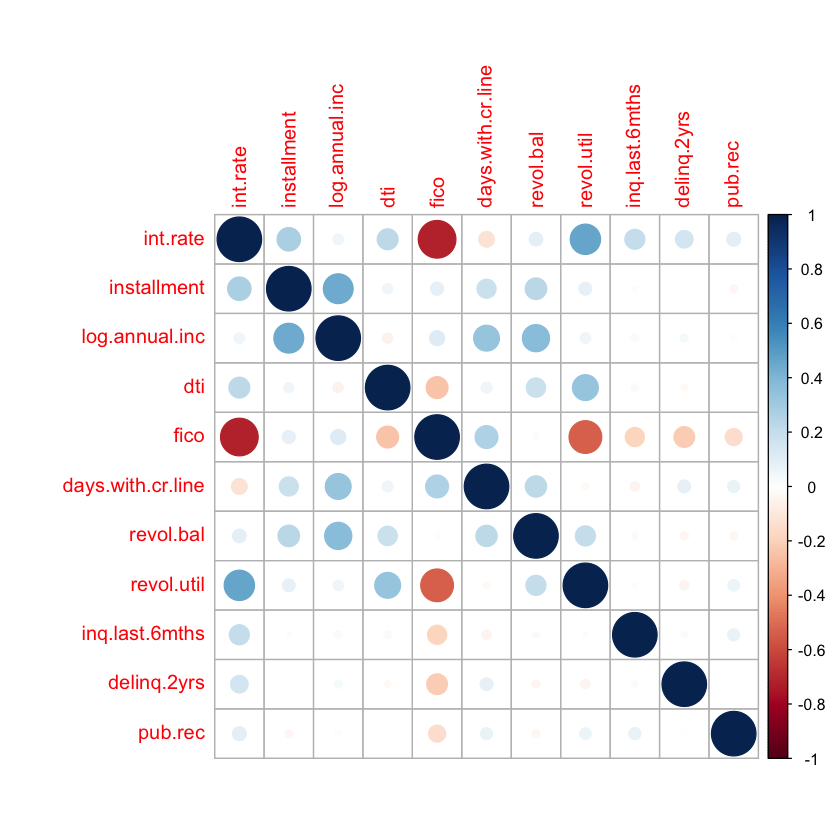

In [189]:
corrplot(cor(loans[,3:13]))

This study is concerned with predicting the probability with which an individual will not repay his/her loan. Before we start, it's worth noting that 16.01% of our portfolio is not yet fully paid. A percentage of these loans will be perfected, while the remainder will be written off. 

In [190]:
unpaid = round(mean(loans$not.fully.paid)*100,2)
cat(paste(unpaid,"% of loans are not fully paid."))

16.01 % of loans are not fully paid.

### The Models ###

#### Logistic Model 1: An Everything-But-The-Kitchen-Sink Approach ####

We start by splitting our data set into training and testing portions and building a logistic model using all independent variables.

In [191]:
set.seed(144)

spl = sample.split(loans$not.fully.paid, .70)
train = subset(loans, spl==TRUE)
test = subset(loans, spl==FALSE)

In [192]:
logit1 = glm(not.fully.paid ~ ., data=train, family=binomial)

The chart below presents the summary data for our model. Eight variables are statistically significant at the .001 level. Three predictors are significant at the .01 level.

In [193]:
summary(logit1)


Call:
glm(formula = not.fully.paid ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2008  -0.6213  -0.4953  -0.3609   2.6389  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                9.250e+00  1.552e+00   5.959 2.54e-09 ***
credit.policy             -3.417e-01  1.009e-01  -3.388 0.000704 ***
purposecredit_card        -6.124e-01  1.344e-01  -4.557 5.18e-06 ***
purposedebt_consolidation -3.199e-01  9.179e-02  -3.485 0.000493 ***
purposeeducational         1.351e-01  1.753e-01   0.771 0.440814    
purposehome_improvement    1.728e-01  1.479e-01   1.168 0.242901    
purposemajor_purchase     -4.828e-01  2.008e-01  -2.404 0.016215 *  
purposesmall_business      4.123e-01  1.418e-01   2.907 0.003653 ** 
int.rate                   6.434e-01  2.085e+00   0.309 0.757592    
installment                1.274e-03  2.092e-04   6.091 1.12e-09 ***
log.annual.inc            -4.328e-01  

The following example will clarify how this model might be used. Assume we have two loan applicants: Alice and Bob. Alice has a FICO score of 700, while Bob has a FICO score of 710. Their applications are the same in all other respects. 

Alice is a riskier credit than Bob, so the odds of Alice **not** fully repaying her loan should be higher, but by how much?

We begin answering this question by computing the log odds derived from the differential between the two FICO scores multiplied by the coefficient attending the fico variable.

In [194]:
-9.408e-03*(700-710)

[1] 0.09408

Exponentiating this result tells us that Alice is approximately 1.099 times more likely to default than Bob. 

In [195]:
round(exp(0.09408),3)

[1] 1.099

#### Out-Of-Sample-Testing ####

Our model provided an interesting result. Performance on out-of-sample data, however, will determine whether or not the model is actually worth anything.

In [196]:
logit_pred = predict(logit1, newdata=test, type="response")

In [197]:
test$pred_risk = logit_pred

When assessing the merit of a logistic model, our first approach is to construct a confusion matrix from which model accuracy can be derived. Below we present the helper function we use to construct the matrix followed by our accuracy calculation function and its return value. 

In [198]:
confusion_mtx = function(df, observed_y, predicted_y, threshold) {
    
    # Input: dataframe, response variable name as string, vector of 
    # predicted values as variable, threshold value as float
    # 
    # Output: Confusion matrix to assess model performance
    
    cmtx=table(df[[observed_y]], predicted_y > threshold)
    return (cmtx)
}

In [199]:
cmtx=confusion_mtx(test, "not.fully.paid", logit_pred, .5)
addmargins(cmtx)

,FALSE,TRUE,Sum
0,2400,13,2413
1,457,3,460
Sum,2857,16,2873


In [200]:
confusion_accuracy = function(confusion_matrix) {
    
    # Input: confusion matrix
    #
    # Output: Message stating the accuracy of the model based on the data
    # contained in the matrix.
    
    accuracy = sum(diag(prop.table(confusion_matrix)))

    return (cat(paste("Based on the confusion matrix, the out-of-sample accuracy of our model is", round(accuracy,4)*100, "%.")))
}

confusion_accuracy(cmtx)

Based on the confusion matrix, the out-of-sample accuracy of our model is 83.64 %.

Accuracy tests based on confusion matrices are meaningless without a baseline to which we can compare the results. Our baseline prediction is the most frequent binary outcome in the response vector for our test set. In our test data set, the most frequent outcome is 0.

In [201]:
cat(paste("Our baseline model has an accuracy of ", round(prop.table(table(test$not.fully.paid)),4)[[1]]*100, "%.", sep=""))

Our baseline model has an accuracy of 83.99%.

The difference between our model's accuracy and that of the baseline is disappointing (83.99% vs 83.64%). We now find ourselves asking whether or not anything can be salvaged. 

#### The ROC Curve ####

We'll consult the Receiver Operator Characteristic Curve (ROC) to assess model performance further. 

Below, we calculate the area under the curve (AUC) for the model. It seems that the model does better than the AUC benchmark of .5, which is indicative of a random process akin to a coin toss, coming in at .6721. This is a very good result and indicates we should, in fact, keep our model. But why, when the confusion matrix returned a substandard outcome? 

Confusion matrices evaluate models at single thresholds supplied by the analyst. There is absolutely nothing wrong with this approach, and we will begin with it where appropriate. The area under the ROC evaluates a model at *all possible* thresholds and, thus, represents a more comprehensive evaluation of model accuracy. The benchmark in this case is .5, a coin toss, representing a purely random process.

In [202]:
pred = prediction(test$pred_risk, test$not.fully.paid)
cat(paste(round(as.numeric(performance(pred, "auc")@y.values), 4)))

0.6721

#### Logistic Model 2: A Smart Baseline ####

Interest rates capture the risk associated with repayment. Though it was not statistically significant in the first model, this was likely due to multicollinearity depicted in our correlation plot. Here, we construct a bivariate model using only interest rates to predict the probability of repayment for two reasons: First, interest rates are intended to capture many of the other relationships extant among the variables in our data set. Second, an alternate baseline model provides another benchmark against which one can judge a model.

In [203]:
logit2 = glm(not.fully.paid ~ int.rate, data=train, family=binomial)

As expected, exclusion of collinear variables from the model reveals that interest rate is a highly significant predictor of loan default. Comparison of AIC scores between logit1 and logit2, however, reveals that logit2 is an inferior model.

In [204]:
summary(logit2)


Call:
glm(formula = not.fully.paid ~ int.rate, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0547  -0.6271  -0.5442  -0.4361   2.2914  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.6726     0.1688  -21.76   <2e-16 ***
int.rate     15.9214     1.2702   12.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5896.6  on 6704  degrees of freedom
Residual deviance: 5734.8  on 6703  degrees of freedom
AIC: 5738.8

Number of Fisher Scoring iterations: 4


In [205]:
logit2_pred = predict(logit2, newdata=test, type="response")

Summary data for predicted values from the model over the test set, presented below, indicate the maximum probability of default is 42.66%. Using a 50% threshold, this implies absolutely no loans will be flagged as "not.fully.paid." This implies a confusion matrix accuracy identical to that of our logit1 model. 

In [206]:
summary(logit2_pred)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06196 0.11549 0.15077 0.15963 0.18928 0.42662 

Below is the AUC calculation for logit2. 

In [207]:
pred2 = prediction(logit2_pred, test$not.fully.paid)
cat(paste(round(as.numeric(performance(pred2, "auc")@y.values), 4)))

0.6239

The AUC for logit1 surpasses that of logit2.  On this score, we are doing comparatively better and should stick with the model we have, rather than changing course. 

### A Simplified, Risk-Based Investment Scenario ###

Assume the following for every investment $I$: interest compunds continuously according to the formula $I\cdot\text{e}^{rt}$, each has a three-year investment term, and the lender experiences a total loss if the loan is not paid in full. Below, we calculate the maximum expected profit of a $10 investment in our test set loan portfolio.

In [208]:
test$profit = exp(test$int.rate*3) - 1

test$profit[test$not.fully.paid == 1] = -1

In [209]:
cat(paste("The max profit for any loan in our test set under the assumptions outlined above is $", round(max(test$profit)*10,2),"."))

The max profit for any loan in our test set under the assumptions outlined above is $ 8.89 .

We wish to invest in the highest yielding loans that have the lowest risk of default. In this section, we do just that.

In [210]:
high_yield = subset(test, test$int.rate >=.15)

In [211]:
cat(paste("The mean profit of a $1 investment in a high-yield loan (int. rate >= 15%) in our test set is", round(mean(high_yield$profit),4),".", sep=""))

The mean profit of a $1 investment in a high-yield loan (int. rate >= 15%) in our test set is0.2251.

In [212]:
cat(paste("The number of high-yield loans (int. rate >= 15%) not fully repaid in our subset is ", round(table(high_yield$not.fully.paid)[[2]],2), ".", sep=""))

The number of high-yield loans (int. rate >= 15%) not fully repaid in our subset is 110.

We will refine our high-yield portfolio further by setting a cutoff for the maximum predicted risk for loans contained therein. Additionally, we'll limit the size of our portfolio to 100 investments by determining the 100th smallest predicted probability of not paying in full by sorting the predicted risks in increasing order and selecting the 100th element of this sorted list. **Note, this is where risk predictions from our best model, Logistic1, come into play.** 

The maximum predicted risk we are willing to accept is approximately .17709.

In [213]:
cutoff = sort(high_yield$pred_risk, decreasing=FALSE)[100]
cutoff

[1] 0.1770881

As expected, there are 100 loans in the revised high-yield portfolio, 19 of which are flagged for default. 

In [214]:
high_yield2 = subset(high_yield, pred_risk <= cutoff)
prop.table(table(high_yield2$not.fully.paid))


   0    1 
0.81 0.19 

In [215]:
cat(paste("The profit from a $1 investment in every loan in our refined high-yield portfolio is         $", round(sum(high_yield2$profit),2),".", sep=""))

The profit from a $1 investment in every loan in our refined high-yield portfolio is         $31.28.

**To recap what happened here**: We calculated the maximum expected profit for the loans in our portfolio under a set of strict assumptions. Next, we identified a subset of our loan portfolio as high-yield (interest rate > 15%). We then decreased the size of this high-yield portfolio to only 100 loans by determining the 100th smallest predicted probability of default. These probabilities were produced by our first model. This strategy allowed us to maximize our return on our investment portfolio, given our subjective risk preferences as expressed in loan default probabilities.

### Beyond the Assignment: Can we do better? ###

We demonstrated that logit1 is a useful model, but it lacks parsimony. This raises the question: Can we do better?

Our lowest AIC was achieved with the model below.

In [216]:
logitx = glm(not.fully.paid ~ . -int.rate -dti -days.with.cr.line -revol.util, data=train, family=binomial)

In [217]:
summary(logitx)


Call:
glm(formula = not.fully.paid ~ . - int.rate - dti - days.with.cr.line - 
    revol.util, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3525  -0.6195  -0.4962  -0.3626   2.6328  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                1.025e+01  1.040e+00   9.855  < 2e-16 ***
credit.policy             -3.301e-01  1.004e-01  -3.287  0.00101 ** 
purposecredit_card        -5.888e-01  1.332e-01  -4.419 9.92e-06 ***
purposedebt_consolidation -2.941e-01  9.015e-02  -3.262  0.00110 ** 
purposeeducational         1.301e-01  1.752e-01   0.742  0.45794    
purposehome_improvement    1.690e-01  1.476e-01   1.145  0.25200    
purposemajor_purchase     -4.931e-01  2.007e-01  -2.457  0.01402 *  
purposesmall_business      4.180e-01  1.381e-01   3.026  0.00248 ** 
installment                1.308e-03  1.912e-04   6.840 7.94e-12 ***
log.annual.inc            -4.292e-01  6.923e-02  -6.

In [218]:
logitx_pred = predict(logitx, newdata=test, type="response")

In [219]:
test$predx_risk = logitx_pred

In [220]:
cmtx=confusion_mtx(test, "not.fully.paid", logitx_pred, .5)

Recall that our baseline model had an accuracy of 83.99%, while logit1 had an accuracy of 83.64%. We see that nothing has change along this dimension.  While it's not as thrilling as seeing an improvement, we did eliminate four variables and did not suffer a deterioration in accuracy. This is positive news. 

In [221]:
confusion_accuracy(cmtx)

Based on the confusion matrix, the out-of-sample accuracy of our model is 83.64 %.

Our AUC score declined by a mere .0021. This is a small price to pay for a model with higher AIC that is free of statistically insignificant, and otherwise multicollinear, variables. 

In [222]:
pred = prediction(test$predx_risk, test$not.fully.paid)
cat(paste(round(as.numeric(performance(pred, "auc")@y.values), 4)))

0.6718

As to whether or not we can do better than our logit1 model, the answer is "yes." Though we cannot improve its accuracy with the current data set, we can greatly improve its parsimony and quality (as measured by its AIC score) by eliminating superfluous variables, along with those responsible for the lion's share of multicollinearity.